In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from utils import tools, metrics
from datasets import supported_datamodules
from models import supported_models
from modules.pca_base_module import PCABaseModule

plt.style.use('seaborn')
log_path = '../logs/CuriosityDataModule/StandardPCA/archive_v1_2021-04-22'

In [2]:
config = tools.load_config(log_path + '/configuration.yaml')
exp_params = config['experiment-parameters']
data_params = config['data-parameters']
module_params = config['module-parameters']

datamodule = supported_datamodules[exp_params['datamodule']](**data_params)
x_test, y_test = datamodule.split(train=False)

with open(log_path + '/fitted_model.p', 'rb') as f:
    model = pickle.load(f)
    
module = PCABaseModule(model)

Experimental parameters
------
{'data-parameters': {'root_data_path': '/home/brahste/Datasets/MartianCuriosity'},
 'experiment-parameters': {'datamodule': 'CuriosityDataModule',
                           'log_dir': 'logs',
                           'model': 'StandardPCA'},
 'module-parameters': {'n_components': None}}


In [3]:
# Run PCA transformation pipeline
test_novelty_scores = module.transform_pipeline(datamodule)

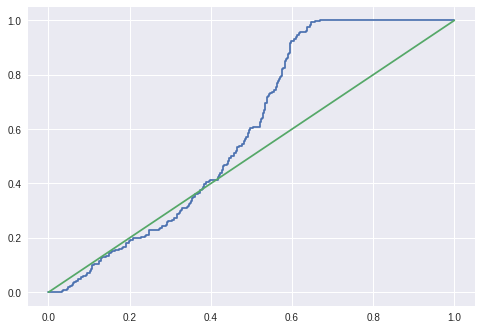

Model ROC AUC:  0.5921716344579102
Random ROC AUC: 0.5


In [6]:
fpr, tpr, thresholds, auc = metrics.roc(test_novelty_scores, y_test)

plt.plot(fpr, tpr)
plt.plot([0., 1.], [0., 1.])
plt.show()
print('Model ROC AUC: ', auc)
print('Random ROC AUC: 0.5')

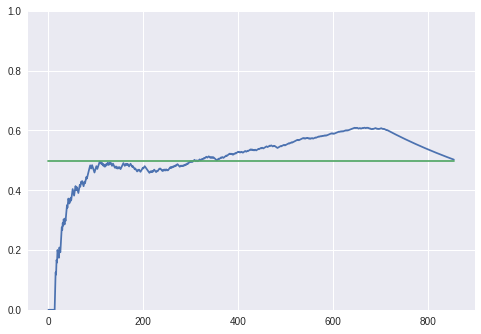

In [9]:
pak = metrics.precision_at_k(test_novelty_scores, y_test)

uniques, counts = np.unique(y_test, return_counts=True)
random = counts.min() / counts.sum()

plt.plot(pak)
plt.plot([0, len(pak)], [random, random])
plt.ylim([0., 1.])
plt.show()